### Data Description

##### This dataset provides detailed information on various user attributes, preferences, and product features that influence the recommendation of personalized skincare products.
##### It is designed for building a multi-class classification model where the goal is to predict the most suitable skincare product category/combination based on user needs which help beauty brands personalize recommendations, optimize marketing campaigns, and enhance customer satisfaction

#### Dataset: Custom-generated synthetic dataset for recommending Personalized Beauty Products
#### Feature Descriptions
##### - Skin_Type: Primary skin type of the user (e.g., Oily, Dry, Combination, Sensitive).
##### - Skin_Tone: User’s skin tone category (e.g., Fair, Medium, Dark).
##### - Skin_Concerns: Specific skin issues the user wants to address (e.g., Acne, Redness, Dullness, Aging, Pigmentation).
##### - Preferences: User’s ethical or budget preferences (e.g., Vegan, Cruelty-Free, Budget-Friendly).
##### - Gender: Gender identity of the user (Male, Female).
##### - Brand: Skincare brand selected or recommended (e.g., Cetaphil, The Ordinary, Olay, Neutrogena).
##### - Ratings: Average customer rating of the recommended product(s), ranging from 1.0 to 5.0.
##### - Active_Compounds: Key active ingredient(s) in the recommended products (e.g., Niacinamide, Hyaluronic Acid, Vitamin C).
##### - Recommended_Products(Target): Final recommended skincare routine (e.g., Serum + Sunscreen, Toner + Serum + Moisturizer).



### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

### Data Reading

In [2]:
data = pd.read_csv("synthetic_skincare_dataset.csv")
data

,Skin_Type,Skin_Tone,Skin_Concerns,Preferences,Gender,Brand,Ratings,Active_Compounds,Recommended_Products
0,Sensitive,Dark,Acne,Budget-Friendly,Male,The Ordinary,8.525868,NaN,Cleanser + Toner + Serum + Moisturizer
1,Sensitive,Medium,Pigmentation,Cruelty-Free,Female,L’Oreal,7.426134,NaN,Cleanser + Toner + Serum + Moisturizer
2,Sensitive,Dark,Pigmentation,Cruelty-Free,Female,L’Oreal,6.103703,NaN,Serum + Sunscreen
3,Dry,Fair,Aging,Cruelty-Free,Female,L’Oreal,6.088379,NaN,Cleanser + Toner + Serum + Moisturizer
4,Combination,Medium,Redness,Budget-Friendly,Female,Cetaphil,6.435105,NaN,Cleanser + Toner + Serum + Moisturizer
...,...,...,...,...,...,...,...,...,...
44057,Combination,Fair,Dullness,Vegan,Male,L’Oreal,1.500000,Peptides,Cleanser + Toner + Serum + Moisturizer
44058,Oily,Medium,Acne,Budget-Friendly,Male,Olay,2.000000,Aloe Vera,Cleanser + Toner + Serum + Moisturizer
44059,Combination,Medium,Aging,Vegan,Female,Olay,1.500000,Hyaluronic Acid,Cleanser + Toner + Serum + Moisturizer
44060,Sensitive,Fair,Aging,Cruelty-Free,Female,Cetaphil,1.300000,Retinol,Serum + Moisturizer + Sunscreen


### Understanding Data

In [3]:
data.shape

(44062, 9)

In [4]:
data.columns

Index(['Skin_Type', 'Skin_Tone', 'Skin_Concerns', 'Preferences', 'Gender',
       'Brand', 'Ratings', 'Active_Compounds', 'Recommended_Products'],
      dtype='object')

In [5]:
data.head()

,Skin_Type,Skin_Tone,Skin_Concerns,Preferences,Gender,Brand,Ratings,Active_Compounds,Recommended_Products
0,Sensitive,Dark,Acne,Budget-Friendly,Male,The Ordinary,8.525868,NaN,Cleanser + Toner + Serum + Moisturizer
1,Sensitive,Medium,Pigmentation,Cruelty-Free,Female,L’Oreal,7.426134,NaN,Cleanser + Toner + Serum + Moisturizer
2,Sensitive,Dark,Pigmentation,Cruelty-Free,Female,L’Oreal,6.103703,NaN,Serum + Sunscreen
3,Dry,Fair,Aging,Cruelty-Free,Female,L’Oreal,6.088379,NaN,Cleanser + Toner + Serum + Moisturizer
4,Combination,Medium,Redness,Budget-Friendly,Female,Cetaphil,6.435105,NaN,Cleanser + Toner + Serum + Moisturizer


In [6]:
data.tail()

,Skin_Type,Skin_Tone,Skin_Concerns,Preferences,Gender,Brand,Ratings,Active_Compounds,Recommended_Products
44057,Combination,Fair,Dullness,Vegan,Male,L’Oreal,1.5,Peptides,Cleanser + Toner + Serum + Moisturizer
44058,Oily,Medium,Acne,Budget-Friendly,Male,Olay,2.0,Aloe Vera,Cleanser + Toner + Serum + Moisturizer
44059,Combination,Medium,Aging,Vegan,Female,Olay,1.5,Hyaluronic Acid,Cleanser + Toner + Serum + Moisturizer
44060,Sensitive,Fair,Aging,Cruelty-Free,Female,Cetaphil,1.3,Retinol,Serum + Moisturizer + Sunscreen
44061,Sensitive,Medium,Redness,Vegan,Male,Olay,3.8,Peptides,Cleanser + Toner + Serum + Moisturizer


In [7]:
data.sample(10)

,Skin_Type,Skin_Tone,Skin_Concerns,Preferences,Gender,Brand,Ratings,Active_Compounds,Recommended_Products
19030,Dry,Medium,Pigmentation,Budget-Friendly,Male,Neutrogena,2.3,Aloe Vera,Serum + Moisturizer
38856,Sensitive,Fair,Pigmentation,Cruelty-Free,Female,Olay,2.4,Aloe Vera,Cleanser + Toner + Serum + Moisturizer
20328,Sensitive,Fair,Dullness,Vegan,Male,The Ordinary,1.7,Hyaluronic Acid,Cleanser + Toner + Serum + Moisturizer
27519,Oily,Fair,Aging,Cruelty-Free,Male,Neutrogena,3.5,Hyaluronic Acid,Cleanser + Toner + Serum + Moisturizer
30532,Dry,Dark,Dullness,Vegan,Female,The Ordinary,1.7,Retinol,Cleanser + Toner + Serum + Moisturizer
203,Combination,Dark,Aging,Budget-Friendly,Female,Cetaphil,NaN,NaN,Serum + Moisturizer + Sunscreen
43327,Combination,Dark,Acne,Cruelty-Free,Female,Cetaphil,3.7,Retinol,Cleanser + Toner + Serum + Moisturizer
37719,Combination,Medium,Aging,Cruelty-Free,Female,Neutrogena,1.6,Peptides,Serum + Moisturizer + Sunscreen
12982,Oily,Fair,Dullness,Budget-Friendly,Female,L’Oreal,4.2,Vitamin C,Serum + Sunscreen
14221,Combination,Medium,Dullness,Cruelty-Free,Male,Cetaphil,1.9,Vitamin C,Serum + Sunscreen


In [8]:
data.describe()

,Ratings
count,43185.000000
mean,3.003704
std,1.170890
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,9.920622


In [9]:
data.describe(include=['int', 'float', 'object'])

,Skin_Type,Skin_Tone,Skin_Concerns,Preferences,Gender,Brand,Ratings,Active_Compounds,Recommended_Products
count,44062,44062,44062,44062,44062,44062,43185.000000,43131,44062
unique,4,3,5,3,2,5,NaN,6,5
top,Oily,Medium,Redness,Cruelty-Free,Male,Olay,NaN,Retinol,Cleanser + Toner + Serum + Moisturizer
freq,11100,14759,8880,14721,22094,8939,NaN,7274,27484
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.003704,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.170890,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44062 entries, 0 to 44061
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Skin_Type             44062 non-null  object 
 1   Skin_Tone             44062 non-null  object 
 2   Skin_Concerns         44062 non-null  object 
 3   Preferences           44062 non-null  object 
 4   Gender                44062 non-null  object 
 5   Brand                 44062 non-null  object 
 6   Ratings               43185 non-null  float64
 7   Active_Compounds      43131 non-null  object 
 8   Recommended_Products  44062 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


In [11]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]
print(cat_col)

['Skin_Type', 'Skin_Tone', 'Skin_Concerns', 'Preferences', 'Gender', 'Brand', 'Active_Compounds', 'Recommended_Products']


### Data Cleaning

In [12]:
data.isna().sum()

Skin_Type                 0
Skin_Tone                 0
Skin_Concerns             0
Preferences               0
Gender                    0
Brand                     0
Ratings                 877
Active_Compounds        931
Recommended_Products      0
dtype: int64

In [13]:
data.Active_Compounds = data.Active_Compounds.fillna(data.Active_Compounds.mode()[0])
data.Ratings = data.Ratings.fillna(data.Ratings.median())

In [14]:
data.duplicated().sum()

np.int64(2447)

In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data.dtypes

Skin_Type                object
Skin_Tone                object
Skin_Concerns            object
Preferences              object
Gender                   object
Brand                    object
Ratings                 float64
Active_Compounds         object
Recommended_Products     object
dtype: object

In [17]:
data.isna().sum()

Skin_Type               0
Skin_Tone               0
Skin_Concerns           0
Preferences             0
Gender                  0
Brand                   0
Ratings                 0
Active_Compounds        0
Recommended_Products    0
dtype: int64

In [18]:
print(data.Skin_Type.unique())
print(data.Skin_Tone.unique())
print(data.Skin_Concerns.unique())
print(data.Preferences.unique())
print(data.Brand.unique())
print(data.Active_Compounds.unique())
print(data.Recommended_Products.unique())

['Sensitive' 'Dry' 'Combination' 'Oily']
['Dark' 'Medium' 'Fair']
['Acne' 'Pigmentation' 'Aging' 'Redness' 'Dullness']
['Budget-Friendly' 'Cruelty-Free' 'Vegan']
['The Ordinary' 'L’Oreal' 'Cetaphil' 'Olay' 'Neutrogena']
['Retinol' 'Niacinamide' 'Aloe Vera' 'Vitamin C' 'Hyaluronic Acid'
 'Peptides']
['Cleanser + Toner + Serum + Moisturizer' 'Serum + Sunscreen'
 'Serum + Moisturizer + Sunscreen' 'Serum + Moisturizer'
 'Toner + Serum + Sunscreen']


In [19]:
data.Recommended_Products.value_counts()

Recommended_Products
Cleanser + Toner + Serum + Moisturizer    26117
Serum + Sunscreen                          5677
Serum + Moisturizer                        3677
Toner + Serum + Sunscreen                  3222
Serum + Moisturizer + Sunscreen            2922
Name: count, dtype: int64

In [20]:
le1 = LabelEncoder()
data.Skin_Type = le1.fit_transform(data.Skin_Type)

le2 = LabelEncoder()
data.Skin_Tone = le2.fit_transform(data.Skin_Tone)

le3 = LabelEncoder()
data.Gender= le3.fit_transform(data.Gender)

le4 = LabelEncoder()
data.Skin_Concerns = le4.fit_transform(data.Skin_Concerns)

le5 = LabelEncoder()
data.Preferences = le5.fit_transform(data.Preferences)

le6 = LabelEncoder()
data.Brand = le6.fit_transform(data.Brand)

le7 = LabelEncoder()
data.Active_Compounds= le7.fit_transform(data.Active_Compounds)


Product_mappings={'Serum + Sunscreen':0,'Toner + Serum + Sunscreen':1,'Serum + Moisturizer':2,
                  'Serum + Moisturizer + Sunscreen':3,'Cleanser + Toner + Serum + Moisturizer':4
}
data["Recommended_Products"]=data["Recommended_Products"].map(Product_mappings)

In [21]:
data.dtypes

Skin_Type                 int64
Skin_Tone                 int64
Skin_Concerns             int64
Preferences               int64
Gender                    int64
Brand                     int64
Ratings                 float64
Active_Compounds          int64
Recommended_Products      int64
dtype: object

### EDA

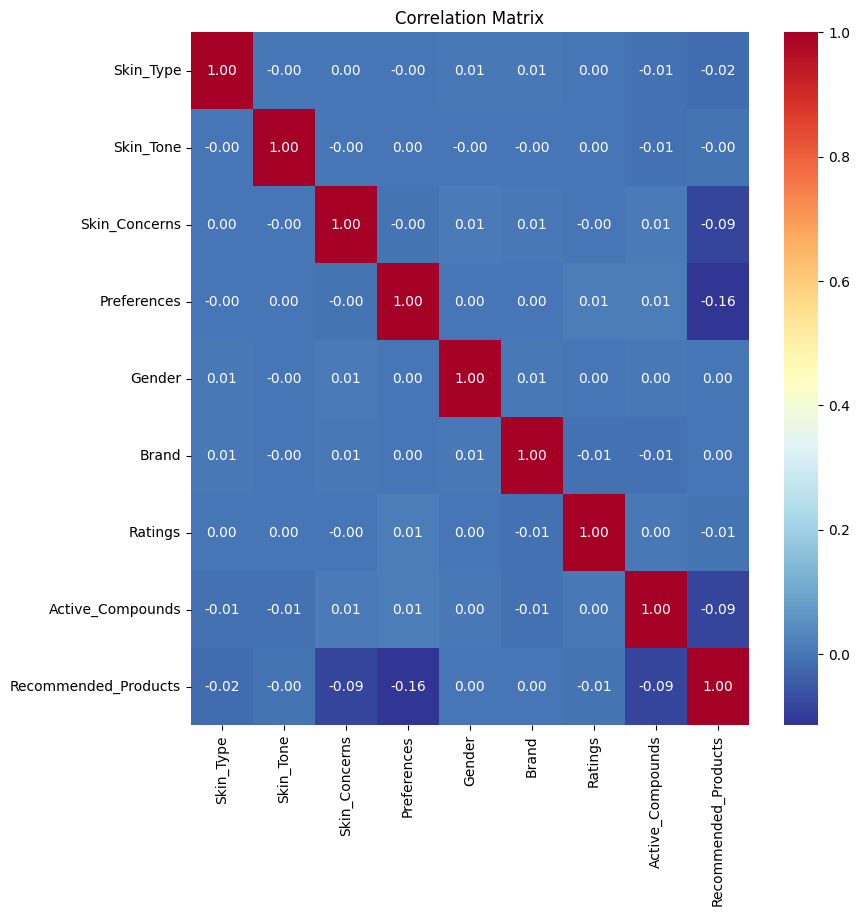

In [22]:
correlation=data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(correlation,cmap='RdYlBu_r',annot=True,fmt='0.2f',robust=True)
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()





🧴 Overall Insight – Skincare Product Recommendation Data

Low Linear Correlation Across Features

Most features (Skin_Type, Skin_Tone, Gender, Brand, Ratings, Active_Compounds) have correlations very close to 0.00 with each other and with the target (Recommended_Products).

This means the dataset is not multicollinear, and each feature adds unique information — good for machine learning.

Weak Relationships with the Target

The target (Recommended_Products) shows its strongest relationships with:

Preferences (-0.16)

Active_Compounds (-0.09)

Skin_Concerns (-0.09)

These are still weak (negative and small), but they are the most influential features when viewed linearly.

Other features (Skin_Type, Tone, Gender, Brand, Ratings) show almost no linear link.

Why So Low?

Correlation is measuring only linear relationships.

Since the dataset is mostly categorical (encoded as numbers) and the target is a class label, linear correlation is not meaningful.

Real-world skincare recommendations depend on non-linear interactions (e.g., oily skin + acne concern → salicylic acid product).

These interactions won’t appear in a simple correlation matrix but can be captured by tree-based or boosting models.

Implications for Modeling

Simple linear models (like logistic regression) might struggle, because they rely heavily on linear correlations.

Non-linear models (Random Forest, Gradient Boosting, XGBoost, Neural Nets) are better suited, since they can capture if-then rules and feature interactions.




In [23]:
data

,Skin_Type,Skin_Tone,Skin_Concerns,Preferences,Gender,Brand,Ratings,Active_Compounds,Recommended_Products
0,3,0,0,0,1,4,8.525868,4,4
1,3,2,3,1,0,1,7.426134,4,4
2,3,0,3,1,0,1,6.103703,4,0
3,1,1,1,1,0,1,6.088379,4,4
4,0,2,4,0,0,0,6.435105,4,4
...,...,...,...,...,...,...,...,...,...
44055,3,0,4,0,1,1,1.300000,0,4
44057,0,1,2,2,1,1,1.500000,3,4
44058,2,2,0,0,1,3,2.000000,0,4
44060,3,1,1,1,0,0,1.300000,4,3


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Skin_Type'),
  Text(1, 0, 'Skin_Tone'),
  Text(2, 0, 'Skin_Concerns'),
  Text(3, 0, 'Preferences'),
  Text(4, 0, 'Gender'),
  Text(5, 0, 'Brand'),
  Text(6, 0, 'Ratings'),
  Text(7, 0, 'Active_Compounds'),
  Text(8, 0, 'Recommended_Products')])

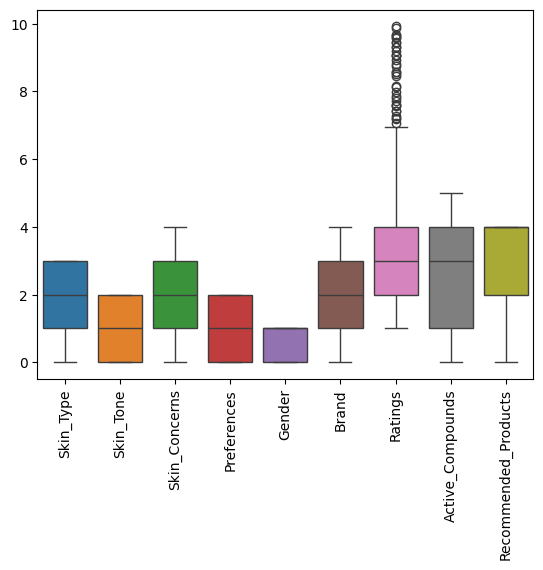

In [24]:
sns.boxplot(data)
plt.xticks(rotation=90)

Key Insights from the Box Plot
1. Ratings Show High Variability
- The Ratings category has the widest spread and the most outliers.
- This suggests that customer satisfaction is highly variable across products, brands, and user profiles


In [25]:
data.shape

(41615, 9)

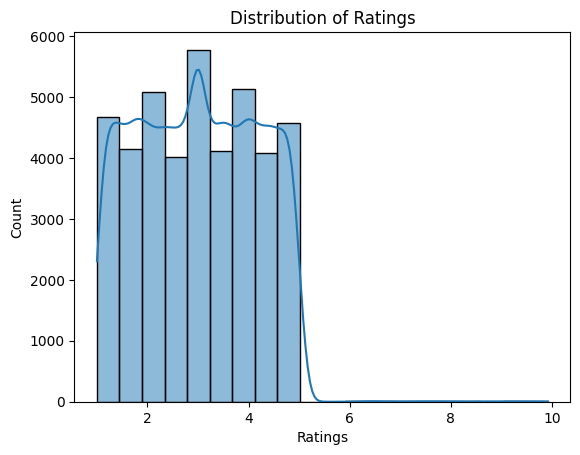

In [26]:
# for col in data:
#     sns.histplot(data[col],kde = True)
#     plt.title(f'Distribution of {col}')
#     plt.show()

sns.histplot(data['Ratings'], kde=True, bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


- Histogram + KDE Curve show:
- Peak around rating 3
- Gradual decline after 5
- Sparse values at 6 and 7

 Interpretation
- Distribution is not perfectly normal, but not heavily skewed either.


In [27]:
original_shape = data.shape

# print(data.columns)
col=data[["Ratings"]]

# Your outlier removal loop here
for i in col:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[i] >= lower) & (data[i] <= upper)]

# Shape after cleaning
new_shape = data.shape

# Print result
print(f'Orginal shape:{original_shape}')
print(f'After removing outliers:{new_shape}')
print(f'Rows removed:{original_shape[0] - new_shape[0]}')


Orginal shape:(41615, 9)
After removing outliers:(41579, 9)
Rows removed:36


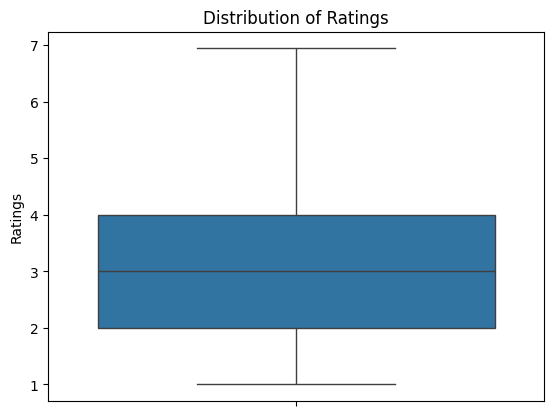

Outliers Removed


In [28]:

sns.boxplot(data['Ratings'])
plt.title('Distribution of Ratings')
plt.show()
print("Outliers Removed")

In [29]:
data.describe()

,Skin_Type,Skin_Tone,Skin_Concerns,Preferences,Gender,Brand,Ratings,Active_Compounds,Recommended_Products
count,41579.000000,41579.000000,41579.000000,41579.000000,41579.000000,41579.000000,41579.000000,41579.000000,41579.000000
mean,1.504245,1.001756,2.000866,0.999735,0.502080,2.006061,2.998544,2.529811,2.975156
std,1.117125,0.816735,1.416592,0.816619,0.500002,1.411647,1.150107,1.701537,1.501161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,3.000000,4.000000
75%,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000
max,3.000000,2.000000,4.000000,2.000000,1.000000,4.000000,6.941053,5.000000,4.000000


In [30]:
x = data.drop("Recommended_Products",axis = 1)
y = data.Recommended_Products
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [31]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train,y_train=smote.fit_resample(x_train,y_train)

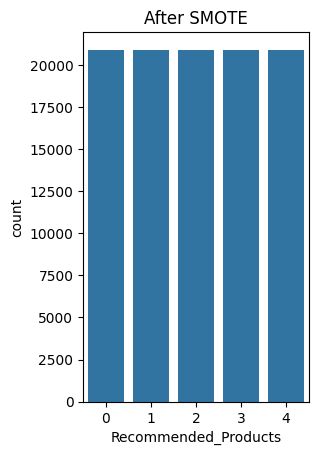

In [ ]:
plt.subplot(1,2,2)
sns.countplot(x=y_train)   # resampled y_train
plt.title("After SMOTE")4
plt.show()

In [33]:
# x_train.plot(kind='hist', subplots=True, layout=(5, 8), figsize=(50, 50))
# plt.suptitle('Histplots of Dataset Features', fontsize=50)
# plt.show()

In [34]:
# y_train.plot(kind='hist', subplots=True, layout=(5, 8), figsize=(50, 50))
# plt.suptitle('Histplots of Dataset Features', fontsize=50)
# # plt.show()

In [35]:
x_train.shape

(104560, 8)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb  

models = {
"Logistic Regression": LogisticRegression(max_iter=1000),
 "Decision Tree": DecisionTreeClassifier(),
 "Random Forest": RandomForestClassifier(),
 "Gradient Boosting": GradientBoostingClassifier(),
 "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
}


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define models that require scaling
scale_sensitive_models = ["LogisticRegression", "SVC", "KNeighborsClassifier"]

def evaluate_classification(model, x_test, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    return acc, prec, rec, f1

results = {}

for name, model in models.items():
    
    # Fit and predict with appropriate data
    if name in scale_sensitive_models:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    acc, prec, rec, f1 = evaluate_classification(model, x_test_scaled, y_test, y_pred)
    results[name] = {
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1": round(f1, 3)
    }

# Convert results dict to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
print(results_df)

                        Accuracy  Precision  Recall     F1
Gradient Boosting          0.951      0.951   0.951  0.950
XGBoost                    0.948      0.948   0.948  0.948
Support Vector Machine     0.927      0.928   0.927  0.927
Random Forest              0.913      0.914   0.913  0.914
Decision Tree              0.850      0.863   0.850  0.854
AdaBoost                   0.785      0.837   0.785  0.796
K-Nearest Neighbors        0.755      0.817   0.755  0.765
Naive Bayes                0.661      0.801   0.661  0.680
Logistic Regression        0.313      0.511   0.313  0.263


Model Performance Insights

Gradient Boosting (95.1% Accuracy, F1 = 0.950) emerged as the best model, showing excellent balance across accuracy, precision, recall, and F1-score.

XGBoost (94.8%) performed almost equally well, confirming that boosting methods are the most effective for this dataset.

Support Vector Machine (92.7%) and Random Forest (91.2%) gave strong results, proving that non-linear and ensemble methods capture the underlying feature interactions better than simple models.

Decision Tree (85%) was moderately successful, but much weaker than its ensemble versions (RF, GBM), highlighting that single trees are too simplistic for complex data.

AdaBoost (78.5%) lagged behind Gradient Boosting and XGBoost, showing sensitivity to noise and weaker generalization.

K-Nearest Neighbors (75.5%) and Naive Bayes (66.1%) underperformed, as they assume feature independence or rely on distance metrics that do not suit categorical, interaction-heavy data.

Logistic Regression (31.3%) was the poorest performer, confirming that linear models fail for this problem since the dataset has low linear correlation with the target.

In [39]:
results_df

,Accuracy,Precision,Recall,F1
Gradient Boosting,0.951,0.951,0.951,0.950
XGBoost,0.948,0.948,0.948,0.948
Support Vector Machine,0.927,0.928,0.927,0.927
Random Forest,0.913,0.914,0.913,0.914
Decision Tree,0.850,0.863,0.850,0.854
AdaBoost,0.785,0.837,0.785,0.796
K-Nearest Neighbors,0.755,0.817,0.755,0.765
Naive Bayes,0.661,0.801,0.661,0.680
Logistic Regression,0.313,0.511,0.313,0.263


### Hyper parameter Tuning

In [40]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],  
#     'bootstrap': [True, False]                
# }

# rfc = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(
#     estimator=rfc,
#     param_grid=param_grid,
#     scoring="accuracy",
#     cv=5,
#     n_jobs=-1
# )

# grid_search.fit(x_train_scaled, y_train)

# print(grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)

In [41]:
# best_model = grid_search.best_estimator_
# print(best_model)
# y_pred = best_model.predict(x_test_scaled)
# # 
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred, average="weighted")
# rec = recall_score(y_test, y_pred, average="weighted")
# f1 = f1_score(y_test, y_pred, average="weighted")

# print(f"Tuned Random Forest --> Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")

In [42]:
model = GradientBoostingClassifier(random_state=42)

In [43]:
model.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [44]:
y_pred=model.predict(x_test)
y_pred

array([4, 4, 4, ..., 0, 2, 4], shape=(8316,))

In [45]:
model.score(x_test,y_test)

0.9508177008177008

In [46]:
from sklearn.metrics import  accuracy_score,classification_report,confusion_matrix

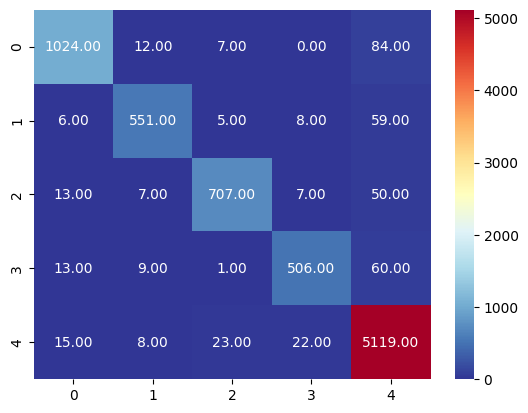

In [47]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='RdYlBu_r',annot=True,fmt='0.2f')
plt.show()

In [48]:
pip install streamlit 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import joblib

# model
joblib.dump(model,'model.pkl')

# Encodes

joblib.dump(le1,'le1.pkl')
joblib.dump(le2,'le2.pkl')
joblib.dump(le3,'le3.pkl')
joblib.dump(le4,'le4.pkl')
joblib.dump(le5,'le5.pkl')
joblib.dump(le6,'le6.pkl')
joblib.dump(le7,'le7.pkl')
joblib.dump(Product_mappings, 'product_mappings.pkl')
#scaler
joblib.dump(scaler,'scaler.pkl')


['scaler.pkl']

In [52]:
import sklearn
print(sklearn.__version__)

1.7.2


In [53]:
print(x_train.columns)

Index(['Skin_Type', 'Skin_Tone', 'Skin_Concerns', 'Preferences', 'Gender',
       'Brand', 'Ratings', 'Active_Compounds'],
      dtype='object')
